### - Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('housing data.csv', sep=',', header=None)
df = pd.DataFrame(ds)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Variables 
* CRIM	represents crime per capita by city.
* ZN	The proportion of residential areas in a given area.
* INDUS	The proportion of acres dedicated to retail in the city.
* CHAS	Binary variable (= 1 if the tracks cross the river and 0 otherwise).
* NOX	Nitric oxide concentration (parts per million).
* RM	Average number of rooms per dwelling.
* AGE	Proportion of owner-occupied buildings, built before 1940.
* DIS	Represents the weighted distance to five employment centers in Boston.
* RAD	Radial road accessibility index.
* TAX	Total value of the tax rate per 10,000 dollars.**
* PTRATIO	Represents the ratio of students per teacher by city.**
* B	Value defined as 1000 (Bk0.63) 2 where Bk is the proportion of African Americans in the city.**
* LSTAT	Percentage of lower class in the population.**
* MEDV	Median value of owner-occupied homes at $ 1,000.**

In [4]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.shape

(506, 14)

<Figure size 432x288 with 0 Axes>

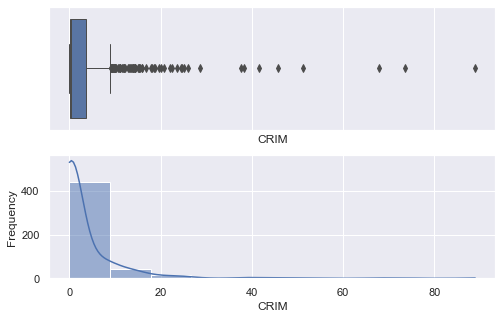

<Figure size 576x360 with 0 Axes>

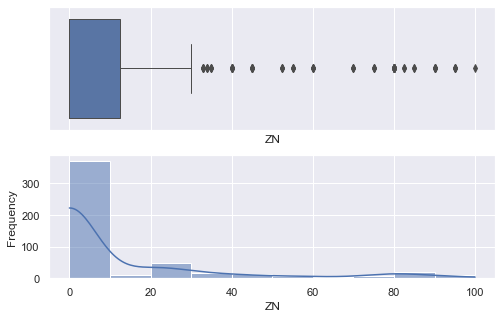

<Figure size 576x360 with 0 Axes>

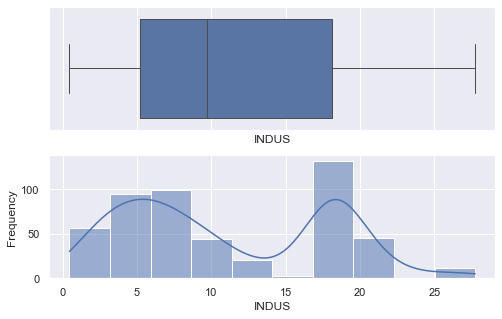

<Figure size 576x360 with 0 Axes>

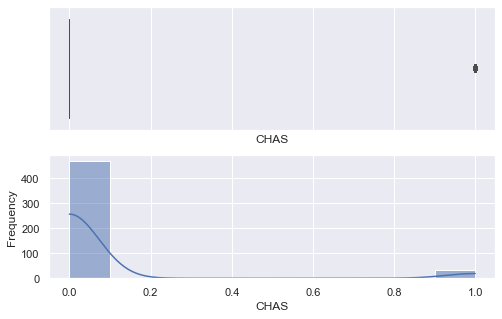

<Figure size 576x360 with 0 Axes>

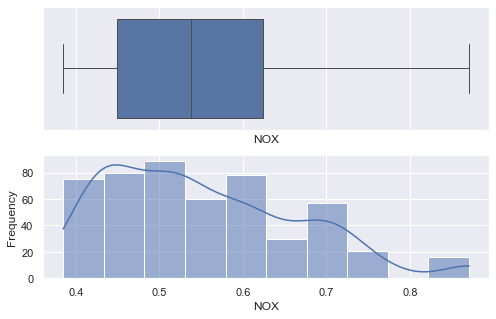

<Figure size 576x360 with 0 Axes>

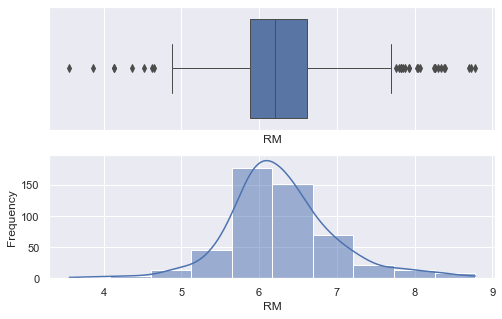

<Figure size 576x360 with 0 Axes>

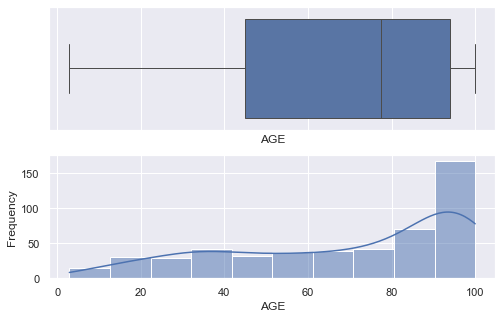

<Figure size 576x360 with 0 Axes>

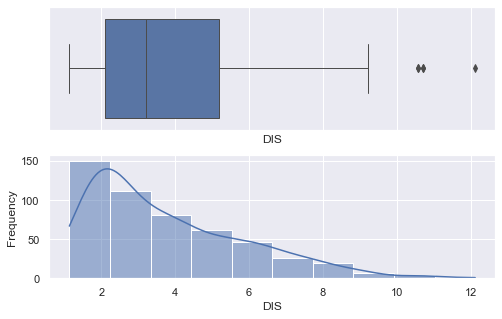

<Figure size 576x360 with 0 Axes>

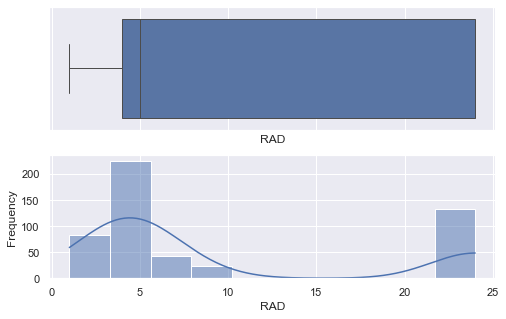

<Figure size 576x360 with 0 Axes>

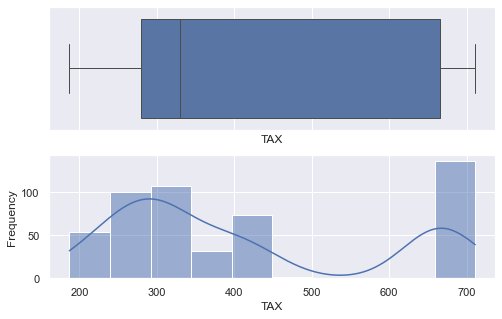

<Figure size 576x360 with 0 Axes>

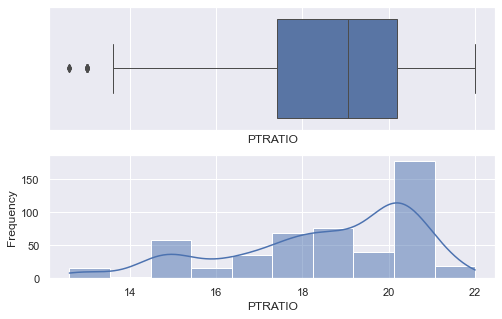

<Figure size 576x360 with 0 Axes>

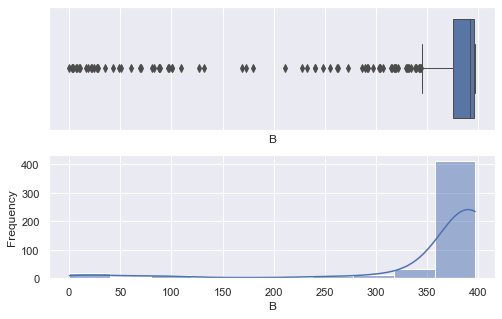

<Figure size 576x360 with 0 Axes>

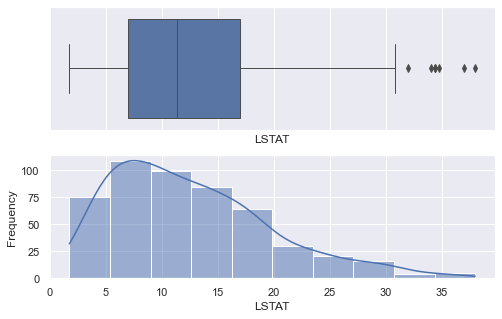

<Figure size 576x360 with 0 Axes>

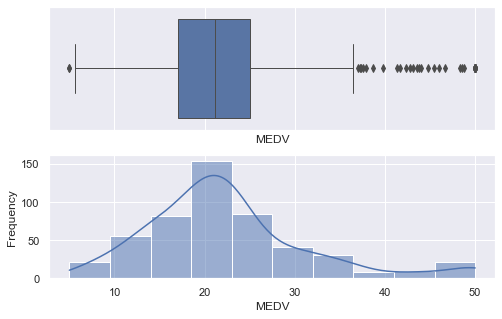

In [9]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

<AxesSubplot:>

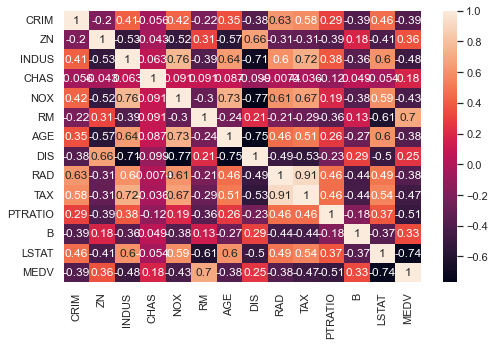

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### PREPROCESADO

In [11]:
df.isnull().values.any()

False

In [12]:
df.isna().values.any()

False

No hay valores nulos ni datos anómalos.

#Shapiro-Wilk Normality Test
* α=0,05
* H0: la muestra tiene una distribución gaussiana.
* H1: la muestra no tiene distribución gaussiana.

In [13]:
from scipy import stats

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print( i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussian.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')

CRIM tiene un p-value=  1.3285517473179391e-36
Se rechaza la hipotesis nula, probablemente no Gaussiana.
ZN tiene un p-value=  7.882576753156324e-34
Se rechaza la hipotesis nula, probablemente no Gaussiana.
INDUS tiene un p-value=  1.0641241829131273e-17
Se rechaza la hipotesis nula, probablemente no Gaussiana.
CHAS tiene un p-value=  2.350467979135232e-40
Se rechaza la hipotesis nula, probablemente no Gaussiana.
NOX tiene un p-value=  5.775580887027246e-14
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RM tiene un p-value=  2.4114604757485836e-10
Se rechaza la hipotesis nula, probablemente no Gaussiana.
AGE tiene un p-value=  2.2305888882906016e-18
Se rechaza la hipotesis nula, probablemente no Gaussiana.
DIS tiene un p-value=  2.1851281171594835e-17
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RAD tiene un p-value=  8.072442074667418e-30
Se rechaza la hipotesis nula, probablemente no Gaussiana.
TAX tiene un p-value=  1.1629455306806005e-23
Se rechaza la hipote

El dataset no contiene variables Gaussianas. A todas las que presentan outliers, aplicaremos sobre X, RobustScaler y a las demás haremos una normalización.
La variable CHAS es binaria.

In [14]:
#Porcentaje  de  outliers en cada variable
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Las variables CRIM, ZN, RM,PTRATO,B,LSTAT y MEDV presentan outliers. 

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Variables sin outliers y no gaussianas.
columnsNorm = ['INDUS','NOX','AGE', 'DIS', 'RAD', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

#Variables con outliers y no gaussianas.
columnsRobust = ['CRIM', 'ZN','RM','PTRATIO', 'B', 'LSTAT', 'MEDV']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

<Figure size 576x360 with 0 Axes>

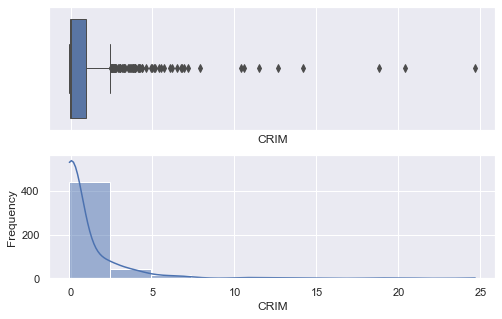

<Figure size 576x360 with 0 Axes>

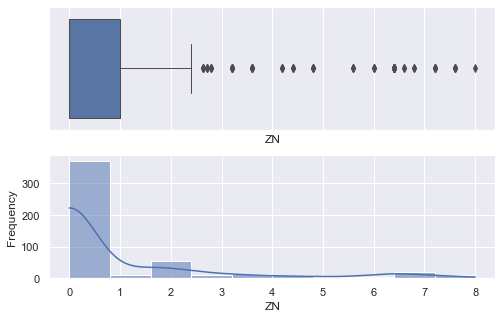

<Figure size 576x360 with 0 Axes>

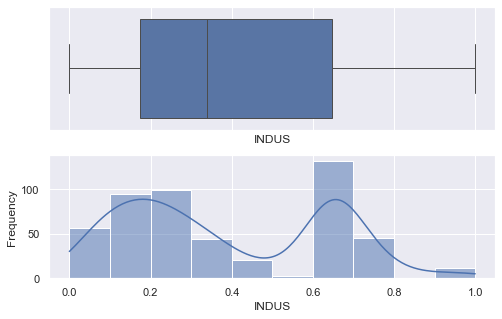

<Figure size 576x360 with 0 Axes>

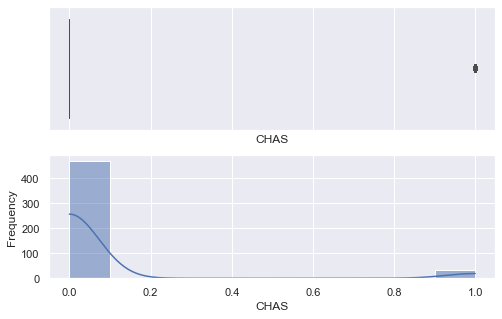

<Figure size 576x360 with 0 Axes>

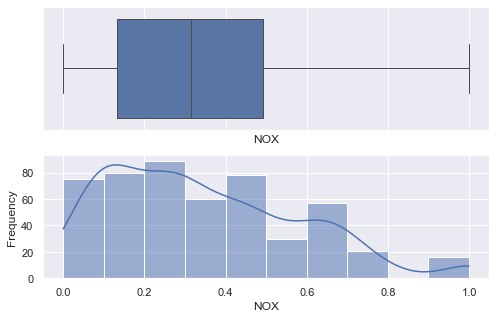

<Figure size 576x360 with 0 Axes>

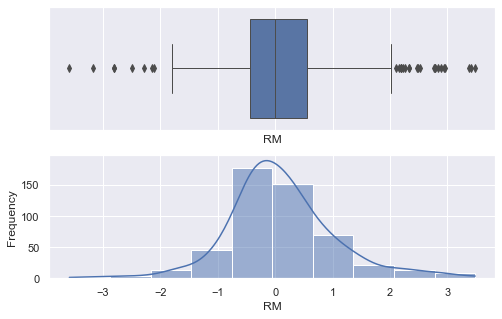

<Figure size 576x360 with 0 Axes>

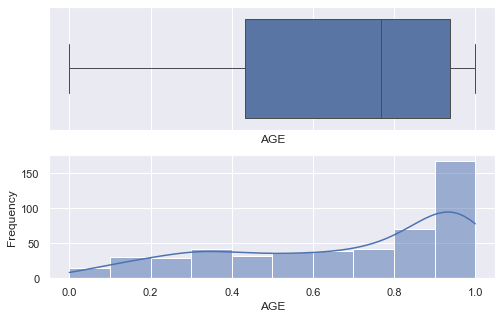

<Figure size 576x360 with 0 Axes>

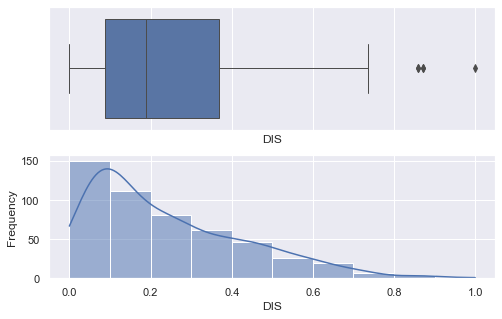

<Figure size 576x360 with 0 Axes>

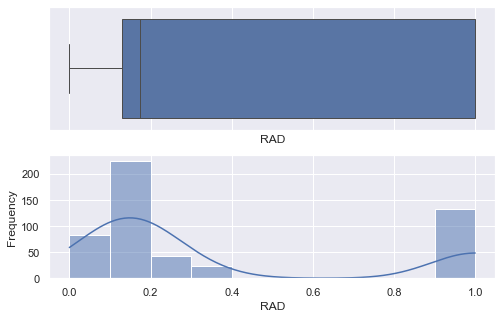

<Figure size 576x360 with 0 Axes>

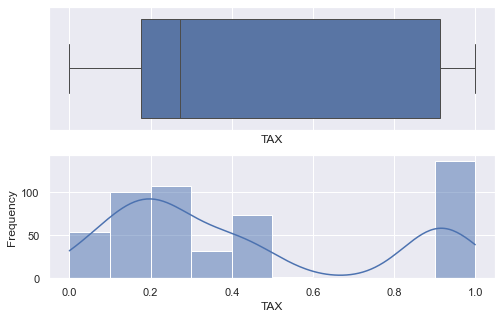

<Figure size 576x360 with 0 Axes>

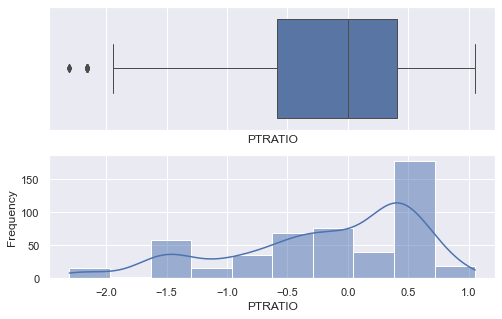

<Figure size 576x360 with 0 Axes>

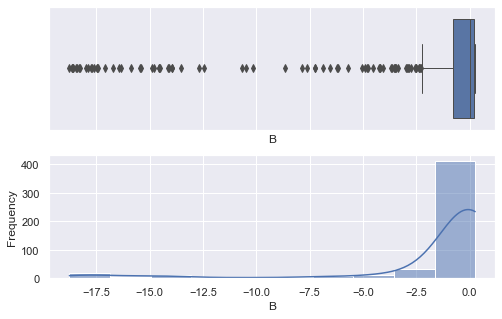

<Figure size 576x360 with 0 Axes>

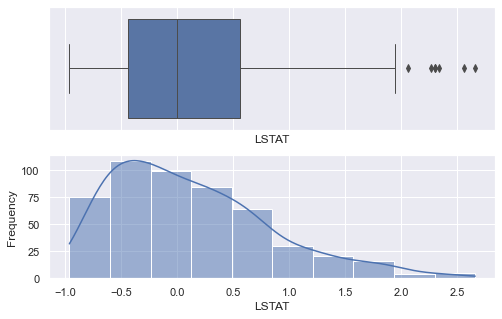

<Figure size 576x360 with 0 Axes>

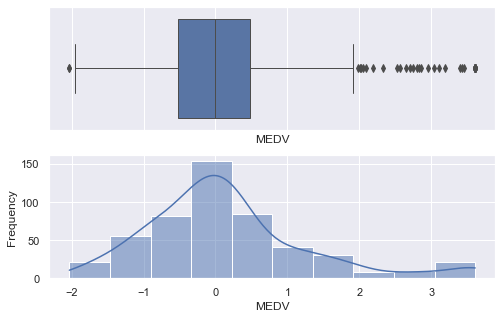

In [16]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

### División entre Features y Target.

In [17]:
#Features
X = df.drop('MEDV',axis=1)
X.shape

(506, 13)

In [18]:
#Target---> columna "MEDV": Valor medio de  viviendas ocupadas por sus propietarios en 1.000 de dólares.
y = df[['MEDV']]
y.shape

(506, 1)

División de los datos en dos grupos , un grupo para capacitación (80%) "Train" y otro grupo para pruebas (20%) "Test".¶

In [19]:
#Training And Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)
X_train.shape

(404, 13)

#### Regresión lineal simple

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Entrenamos el modelo RL 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# 5 Predicciones
y_pred = lr.predict(X_test)
 
print(y_pred [0:5])

[[ 0.4626505 ]
 [ 0.31616437]
 [ 1.02382429]
 [-1.13825878]
 [ 0.03057336]]


In [23]:
print("Coeficientes: \n", lr.coef_)

Coeficientes: 
 [[-0.05384372  0.07018801  0.01876338  0.29351769 -0.98257952  0.34320091
  -0.03800088 -1.91173332  0.70421336 -0.72207769 -0.36721998  0.02120068
  -0.61823087]]


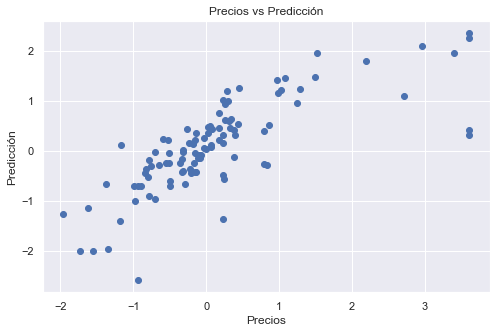

In [24]:
plt.scatter(y_test, y_pred)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()

In [27]:
#Entrenamos el modelo Random Forest
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
# 5 Predicciones
pred_rf = rf.predict(X_test) 
print(pred_rf [0:5])

[ 0.34532915  0.67021944  0.17416928 -1.24200627 -0.04200627]


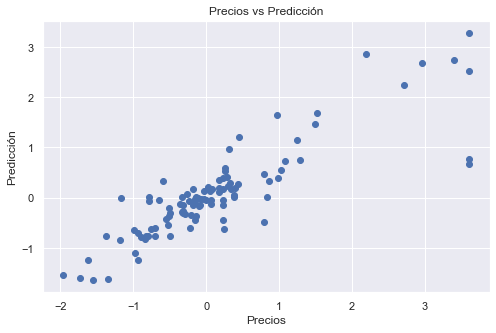

In [29]:
plt.scatter(y_test, pred_rf)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

### Exercici 2
Compara’ls en base al MSE i al R2.

In [30]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test,y_pred)
mse_rf = mean_squared_error(y_test, pred_rf)
print(' Mean Squared Error (MSE) para el modelo Linear Regression es: %.3f'% mse_lr ,
      '\n Mean Squared Error (MSE) para el modelo Random Forest es: %.3f'%mse_rf )

 Mean Squared Error (MSE) para el modelo Linear Regression es: 0.526 
 Mean Squared Error (MSE) para el modelo Random Forest es: 0.320


In [31]:
#R2 Score
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_pred )
r2_rf= r2_score(y_test, pred_rf)
print('R2 Score para el modelo Linear Regression es: %.3f'% r2_lr,
      '\nR2 Score para el modelo Random Forest es: %.3f'% r2_rf)

R2 Score para el modelo Linear Regression es: 0.589 
R2 Score para el modelo Random Forest es: 0.750


In [32]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Randon Forest', r2_rf, mse_rf]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.589222,0.525922
1,Randon Forest,0.750272,0.319728


Se observa que el modelo Randon Forest tine un R2 del 74,98% bastante mayor al R2 del modelo de Regresión Lineal que es del 58,92%, por lo que es el modelo Randon Forest más eficiente. Además el modelo RF tiene un error cuadrático medio menor (32,02%) que el MSE del modelo LR que es de (52,59%). 


### - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.



El modelo Randon Forest arrojó mejores resultados por lo que lo utilizaremos para este ejercicio.

In [33]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
r2_score(y_test, pred_rf)

0.746799514380319

In [35]:
from pprint import pprint
print('Parámetros actualmente en uso:\n')
pprint(rf.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### - Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [36]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')

In [37]:
cv_lr_mean = [cv_lr.mean(), cv_rf.mean()]
metrics['R2 con CV'] = cv_lr_mean
metrics.head()

,Model,R2,MSE,R2 con CV
0,Linear Regression,0.589222,0.525922,0.353276
1,Randon Forest,0.750272,0.319728,0.611986


### - Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [39]:
x_1 = df.drop(['MEDV','RM'],axis=1)
x_1.shape

(506, 12)

In [42]:
x_1_train, x_1_test, y_train, y_test = train_test_split(x_1, y, random_state=0, train_size = 0.80)

print(x_1_train.shape, x_1_test.shape, y_train.shape, y_test.shape)

(404, 12) (102, 12) (404, 1) (102, 1)


In [45]:
#Utilizare sólo Randon Forest
rf.fit(x_1_train, y_train)

RandomForestRegressor(max_depth=100, random_state=42)

In [49]:
pred_rf_1 = rf.predict(x_1_test) 

print(pred_rf_1 [0:5])

[ 0.96815047  0.10507837  0.2200627  -1.29818182 -0.08401254]


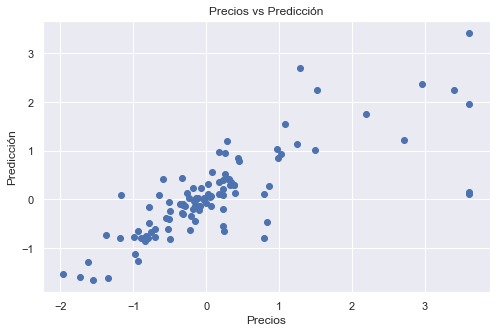

In [50]:
plt.scatter(y_test, pred_rf_1)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

In [51]:
mse_rf_1 = mean_squared_error(y_test, pred_rf_1)
print('Mean Squared Error (MSE) para el modelo Random Forest es: %.3f'%mse_rf )

Mean Squared Error (MSE) para el modelo Random Forest es: 0.320


In [52]:
#R2 Score
r2_rf_1= r2_score(y_test, pred_rf_1)
print('R2 Score para el modelo Random Forest es: %.3f'% r2_rf)

R2 Score para el modelo Random Forest es: 0.750


In [56]:
metrics_1 = pd.DataFrame( data = [['Randon Forest', r2_rf_1, mse_rf_1]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics_1.head()

,Model,R2,MSE
0,Randon Forest,0.613132,0.49531
